## Sentiment Analysis Assignment by Rohan Savaliya and Krunalkumar Solanki

**Import the necessary libraries and load the dataset and perform cleaning process**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Reviews.csv')

# Display the first few rows of the dataset
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [2]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Display the cleaned data
print(data.head())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600

In [6]:
import nltk
nltk.download('vader_lexicon')


from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment_vader(score):
    if score >= 0.05:
        return 'happy'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Text' column using VADER
data['vader_sentiment_score'] = data['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['vader_sentiment'] = data['vader_sentiment_score'].apply(classify_sentiment_vader)

# Display the DataFrame with the new VADER sentiment columns
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


In [8]:
from textblob import TextBlob

# Function to get sentiment polarity using TextBlob
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(score):
    if score > 0.05:
        return 'happy'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Text' column using TextBlob
data['textblob_sentiment_score'] = data['Text'].apply(get_sentiment_textblob)
data['textblob_sentiment'] = data['textblob_sentiment_score'].apply(classify_sentiment_textblob)

# Display the DataFrame with the new TextBlob sentiment columns
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


In [10]:
data.to_csv('processed_amazon_reviews.csv', index=False)

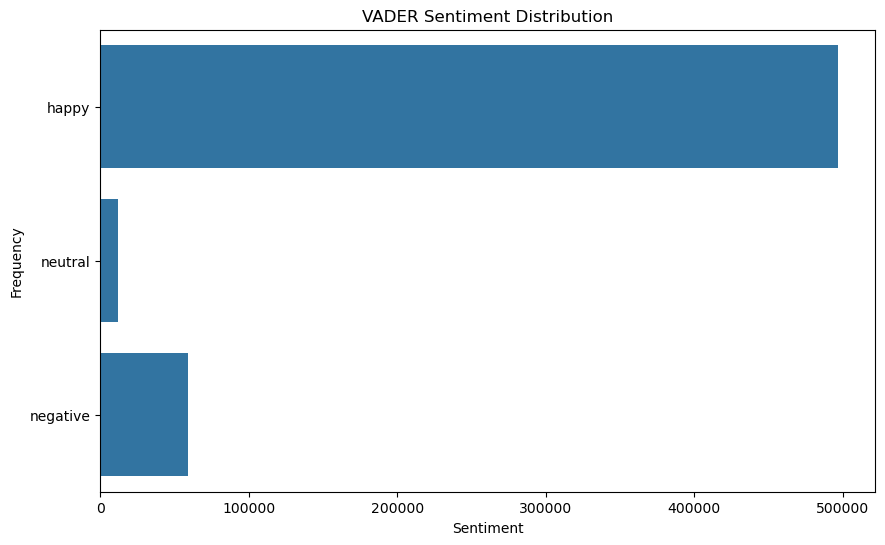

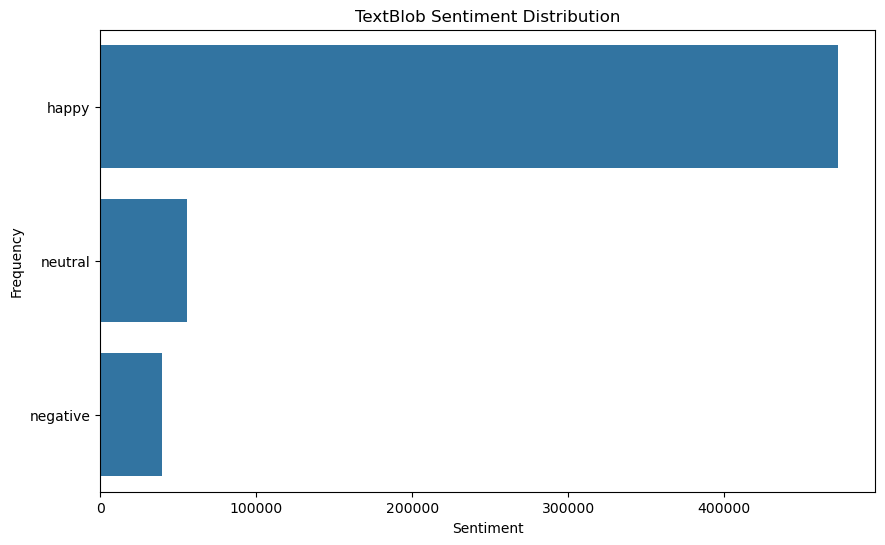

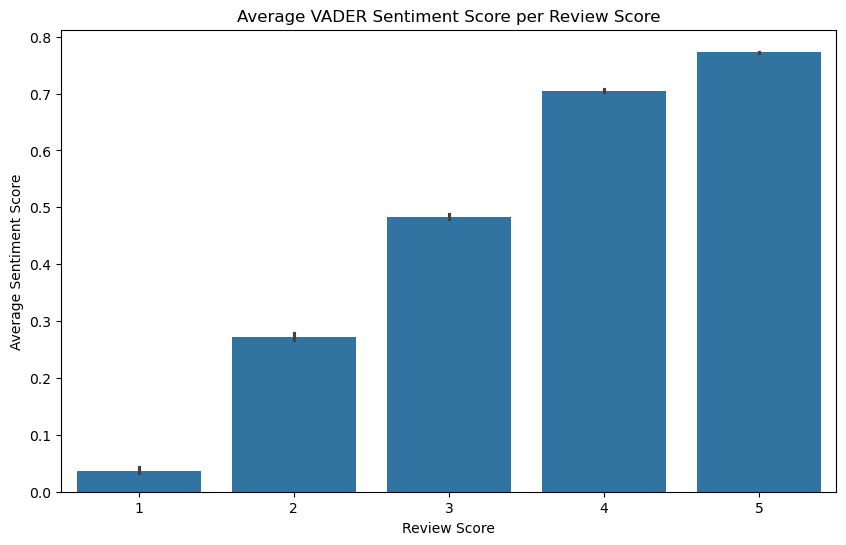

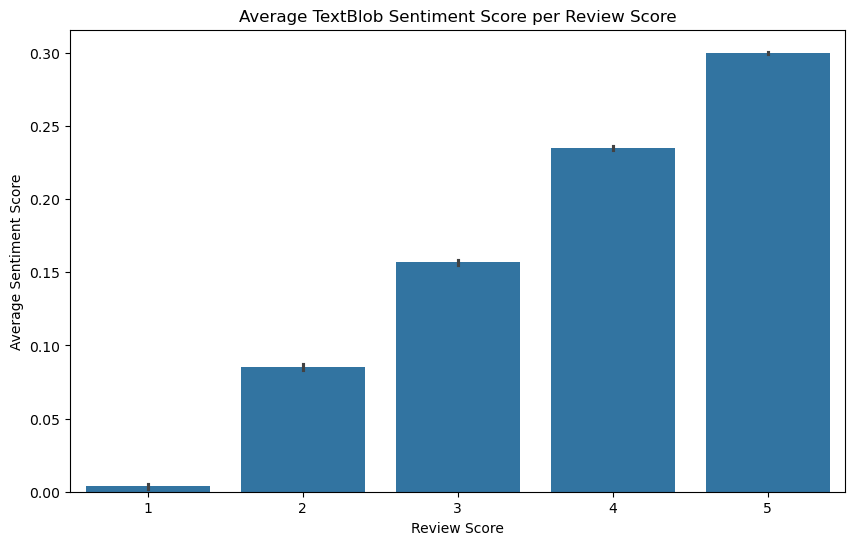

In [11]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Visualize VADER sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data['vader_sentiment'], order=['happy', 'neutral', 'negative'])
    plt.title('VADER Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.show()
    
    # Visualize TextBlob sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data['textblob_sentiment'], order=['happy', 'neutral', 'negative'])
    plt.title('TextBlob Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.show()
    
    # Bar plot of average sentiment score per review score using VADER
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='vader_sentiment_score', data=data)
    plt.title('Average VADER Sentiment Score per Review Score')
    plt.xlabel('Review Score')
    plt.ylabel('Average Sentiment Score')
    plt.show()
    
    # Bar plot of average sentiment score per review score using TextBlob
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='textblob_sentiment_score', data=data)
    plt.title('Average TextBlob Sentiment Score per Review Score')
    plt.xlabel('Review Score')
    plt.ylabel('Average Sentiment Score')
    plt.show()